# **DSCubed Classification Competition**

### Problem Description

This project was part of the **DSCubed Heart Disease Prediction Competition** hosted on Kaggle, where the goal was to predict the severity of heart disease based on a dataset collected from five hospitals across Melbourne. The dataset includes several features such as blood sugar levels, cholesterol, electrocardiogram (ECG) results, and other patient data. 

The objective was to build a machine learning model that accurately predicts whether a patient is diagnosed with heart disease and its severity based on the available features.

### Approach

The following steps were followed in this notebook:

1. **Data Loading and Exploration**: 
    - Load the dataset and examine its structure, including missing values and class distribution.

2. **Data Cleaning**: 
    - Handle missing values by imputing appropriate statistics (median for numerical columns and mode for categorical columns).

3. **Feature Engineering**: 
    - Encode categorical variables using one-hot encoding.
    - Align the train and test datasets to ensure consistent feature sets.

4. **Class Balancing using SMOTE**: 
    - Since the dataset is imbalanced, we used **SMOTE (Synthetic Minority Oversampling Technique)** to balance the class distribution.

5. **Model Training**:
    - Train a **Random Forest Classifier** using cross-validation.
    - Evaluate the model using **accuracy** and **weighted F1 score** metrics.

6. **Prediction and Submission**: 
    - Make predictions on the test data and prepare a submission file for the competition.

The final model's performance was evaluated using cross-validation and was submitted to Kaggle for the competition.

### Dataset

- The dataset contains multiple features including:
    - **Numerical features**: blood sugar levels, cholesterol, heart rate, etc.
    - **Categorical features**: month of diagnosis, presence of ECG changes, and more.

### Goal

The primary goal of this competition is to predict the severity of heart disease for patients based on their medical data and other features.


### **Data Loading**

**Importing Required Libraries**

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

**Load train and test datasets**

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display missing values and data types for both datasets
print(train_df.isnull().sum())
print(test_df.isnull().sum())
print(train_df.dtypes)
print(test_df.dtypes)

id               0
age              0
sex              0
hospital         0
month           60
pain             0
heartrate       44
pressure        40
cholesterol     25
sugar           72
overweight      40
ecg            244
stress         393
corang           1
blocked        474
diagnosis        0
dtype: int64
id               0
age              0
sex              0
hospital         0
month           16
pain             0
heartrate       13
pressure        13
cholesterol      5
sugar           15
overweight      13
ecg             61
stress         107
corang           1
blocked        125
dtype: int64
id               int64
age              int64
sex             object
hospital        object
month           object
pain            object
heartrate      float64
pressure       float64
cholesterol    float64
sugar           object
overweight      object
ecg             object
stress          object
corang          object
blocked        float64
diagnosis        int64
dtype: object
id 

### **Class Distribution**

**Display class distribution for the target variable 'diagnosis'**

In [7]:
print("\nClass distribution:")
print(train_df['diagnosis'].value_counts())


Class distribution:
diagnosis
0    332
1    204
2     87
3     79
4     19
Name: count, dtype: int64


**Visualize class distribution**

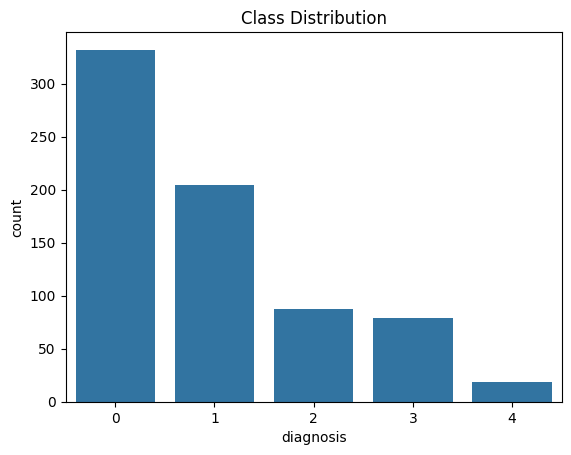

In [12]:
sns.countplot(x=train_df['diagnosis'])
plt.title('Class Distribution')
plt.show()

### **Data Cleaning**

**Handle missing values for numerical and categorical columns**

In [13]:
# Numerical columns - fill missing values with median
numerical_columns = ['heartrate', 'pressure', 'cholesterol', 'blocked']
for col in numerical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

# Categorical columns - fill missing values with mode
categorical_columns = ['month', 'sugar', 'overweight', 'ecg', 'stress', 'corang']
for col in categorical_columns:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [14]:
print("\nMissing values after imputation (train):\n", train_df.isnull().sum())
print("\nMissing values after imputation (test):\n", test_df.isnull().sum())


Missing values after imputation (train):
 id             0
age            0
sex            0
hospital       0
month          0
pain           0
heartrate      0
pressure       0
cholesterol    0
sugar          0
overweight     0
ecg            0
stress         0
corang         0
blocked        0
diagnosis      0
dtype: int64

Missing values after imputation (test):
 id             0
age            0
sex            0
hospital       0
month          0
pain           0
heartrate      0
pressure       0
cholesterol    0
sugar          0
overweight     0
ecg            0
stress         0
corang         0
blocked        0
dtype: int64


### **Feature Engineering**

**One-hot encode categorical columns and align datasets**

In [15]:
categorical_cols = ['sex', 'hospital', 'month', 'pain', 'sugar', 'overweight', 'ecg', 'stress', 'corang']
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Align train and test datasets to have the same columns
train_df_encoded, test_df_encoded = train_df_encoded.align(test_df_encoded, join='left', axis=1, fill_value=0)
test_df_encoded = test_df_encoded.drop(columns=['diagnosis'], errors='ignore')

### **Feature Selection**

**Separate features and target variable for training**

In [16]:
X_train = train_df_encoded.drop(columns=['id', 'diagnosis'])
y_train = train_df_encoded['diagnosis']
X_test = test_df_encoded.drop(columns=['id'])

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (721, 32)
Test data shape: (179, 32)


### **Class Balancing using SMOTE**

**Apply SMOTE to balance the class distribution**

In [17]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
diagnosis
0    332
1    332
3    332
2    332
4    332
Name: count, dtype: int64


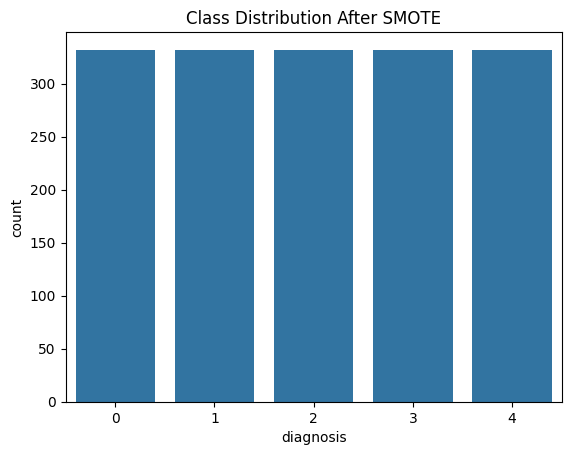

In [18]:
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After SMOTE')
plt.show()

### **Model Training and Evaluation**

**Train Random Forest model with cross-validation**

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores_smote = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy with SMOTE: {cv_scores_smote.mean():.4f}")

Cross-Validation Accuracy with SMOTE: 0.8458


In [20]:
# Calculate weighted F1 score with cross-validation
cv_f1_scores_smote = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
print(f"Weighted F1 Score with SMOTE: {cv_f1_scores_smote.mean():.4f}")

Weighted F1 Score with SMOTE: 0.8420


In [21]:
# Fit the Random Forest model to the entire training data
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### **Prediction and Submission**

**Make predictions on the test data**

In [22]:
y_test_pred = rf_model.predict(X_test)

submission = pd.DataFrame({
    'id': test_df_encoded['id'], 
    'diagnosis': y_test_pred
})

submission.to_csv('heart-disease-prediction-results.csv', index=False)